In [2]:
%matplotlib inline

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
import seaborn as sns
from scipy.interpolate import make_interp_spline

In [4]:
df = pd.read_csv('summer-travel-gps-full.csv', encoding='utf-8', index_col='date', parse_dates=True)
rs = pd.read_csv('summer-travel-gps-dbscan.csv', encoding='utf-8')

In [5]:
df.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [6]:
rs.head()

,lat,lon,date,city,country
0,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
1,38.781775,-9.137544,05/14/2014 15:11,Lisbon,Portugal
2,38.771939,-9.128911,05/14/2014 15:41,Lisbon,Portugal
3,38.742987,-9.147780,05/14/2014 16:11,Lisbon,Portugal
4,38.693780,-9.206363,05/15/2014 14:19,Lisbon,Portugal


In [7]:
country_counts = df['country'].value_counts()
top_countries = country_counts.head(10)
top_countries

Spain                646
Portugal             256
Germany              225
Czech Republic       130
Poland               104
Turkey                94
Greece                82
Montenegro            51
Macedonia (FYROM)     34
Croatia               30
Name: country, dtype: int64

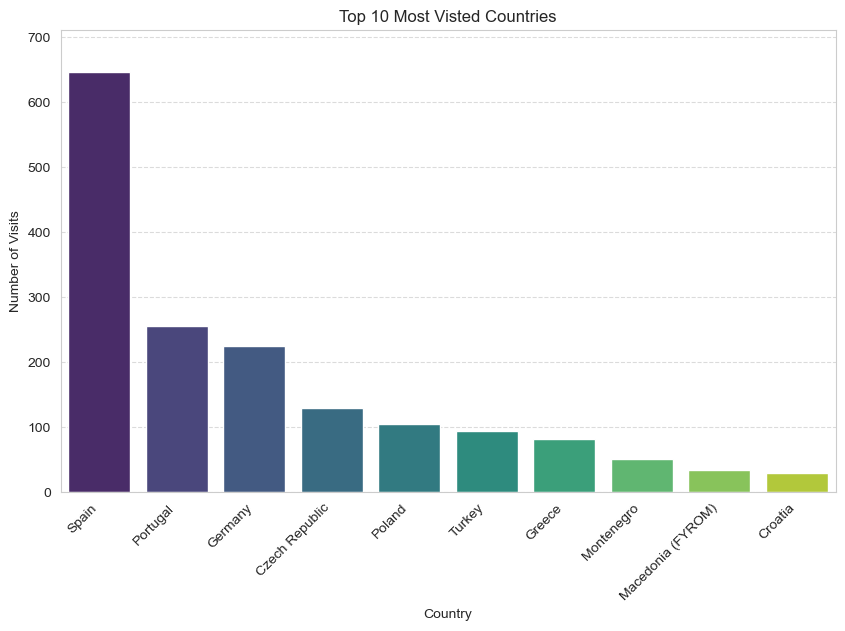

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")
plt.title('Top 10 Most Visted Countries')
plt.xlabel('Country')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y',linestyle='--',alpha=0.7)
plt.xlim(-0.5,9.5)
plt.ylim(0,top_countries.values.max()*1.1)
plt.show()

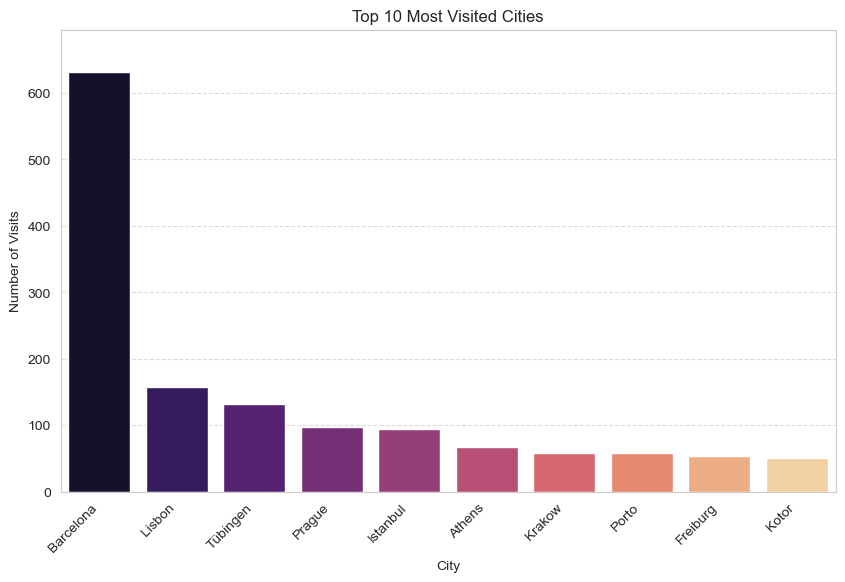

In [9]:
city_counts = df['city'].value_counts()
top_cities = city_counts.head(10)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.index, y=top_cities.values, palette="magma")
plt.title('Top 10 Most Visited Cities')
plt.xlabel('City')
plt.ylabel('Number of Visits')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xlim(-0.5, 9.5)
plt.ylim(0, top_cities.values.max() * 1.1)
plt.show()

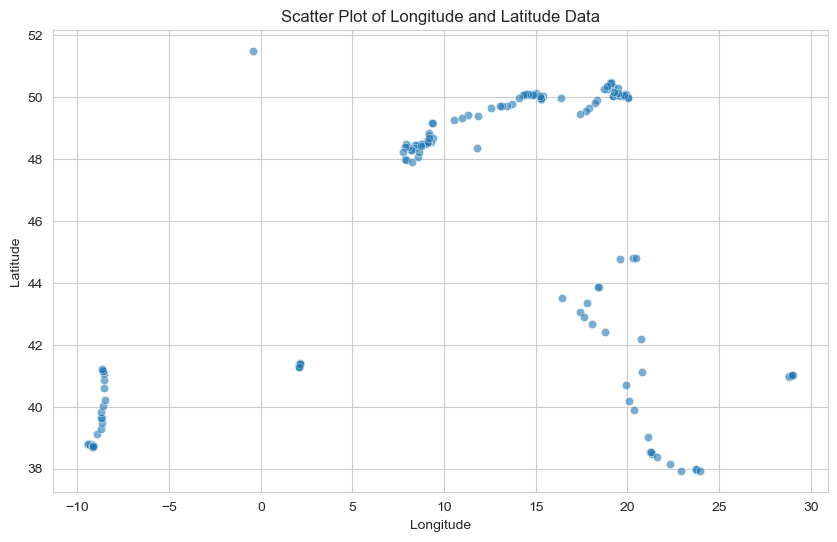

In [10]:
plt.figure(figsize=(10,6))
alpha_value=0.6
sns.scatterplot(x='lon', y='lat', data=rs, alpha=alpha_value)
plt.title('Scatter Plot of Longitude and Latitude Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [11]:
countdata = df.groupby(df.index.date).size()
countdata.head()

2014-05-14    36
2014-05-15    61
2014-05-16    57
2014-05-17    64
2014-05-18    50
dtype: int64

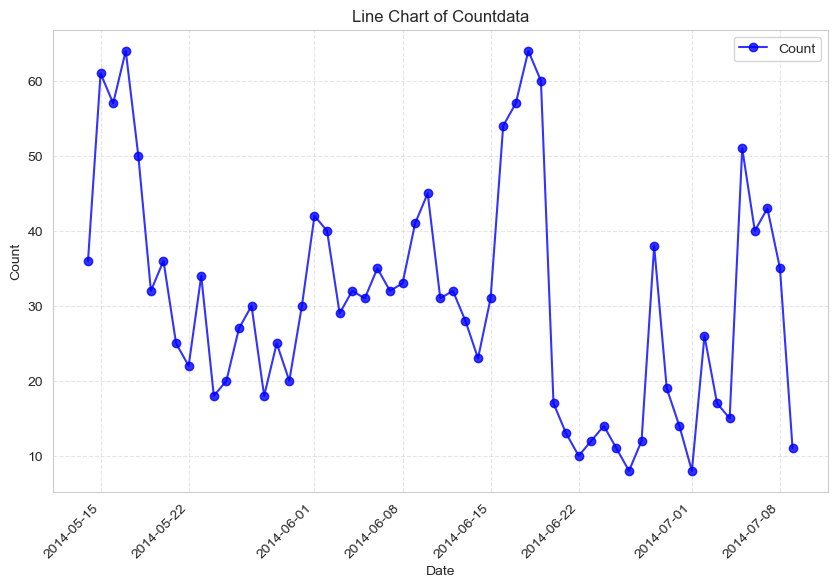

In [12]:
plt.figure(figsize=(10,6))
alpha_value=0.8
plt.plot(countdata.index,countdata.values,color='blue',alpha=alpha_value,marker='o',linestyle='-')
plt.title('Line Chart of Countdata')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='both',linestyle='--',alpha=0.5)
plt.legend(['Count'],loc='best')
plt.show()

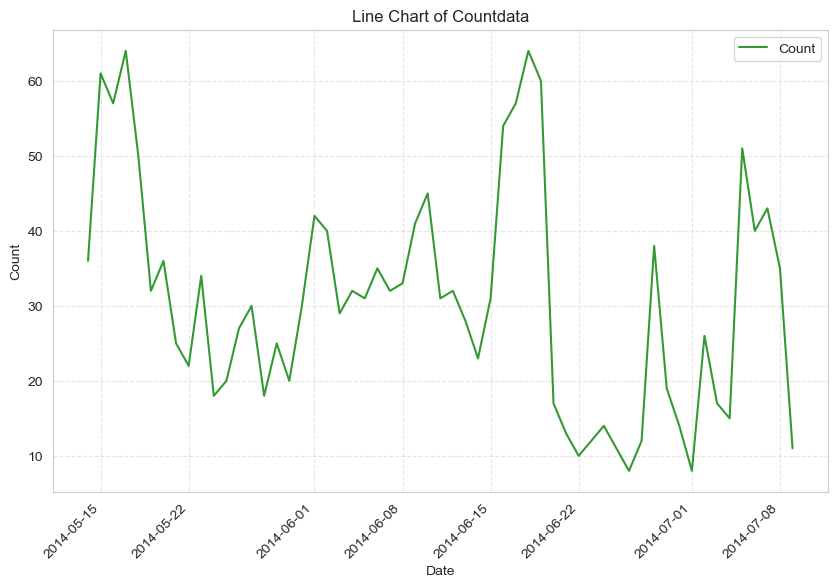

In [13]:
plt.figure(figsize=(10,6))
alpha_value=0.8
plt.plot(countdata.index,countdata.values,color='green',alpha=alpha_value)
plt.title('Line Chart of Countdata')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='both',linestyle='--',alpha=0.5)
plt.legend(['Count'],loc='best')
plt.show()

In [14]:
cities =df['city'].value_counts()
print(cities.count())
cities.head()

113


Barcelona    632
Lisbon       158
Tübingen     131
Prague        97
Istanbul      94
Name: city, dtype: int64

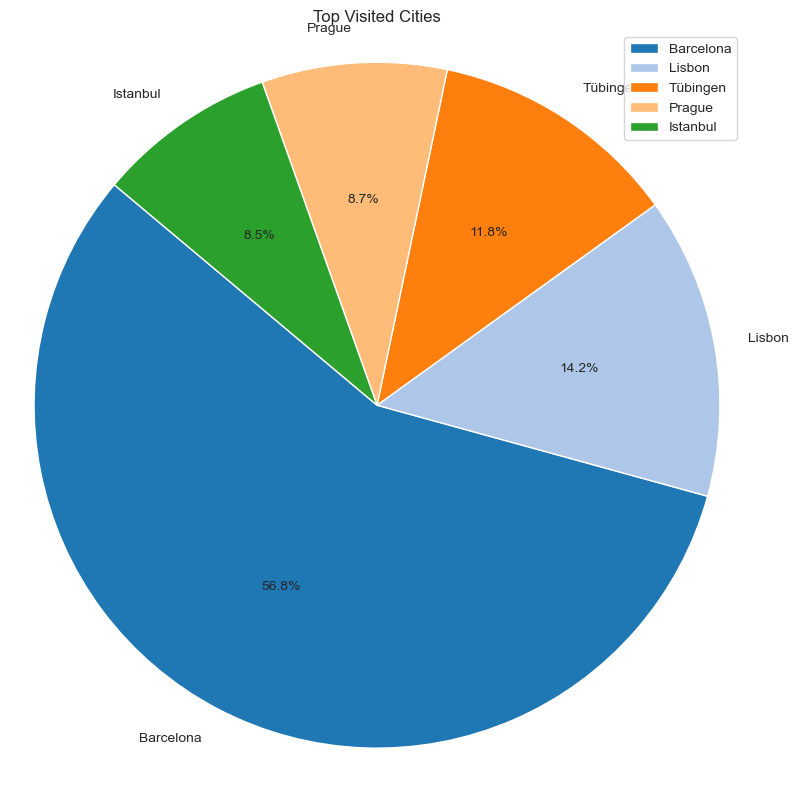

In [15]:
num_cities=cities.count()
top_cities=cities.head()
plt.figure(figsize=(8,8))
plt.pie(top_cities,labels=top_cities.index,autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Top Visited Cities')
plt.legend(loc='upper right')
plt.axis('equal')  
plt.tight_layout() 
plt.show()

In [16]:
pip install keplergl

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [17]:
from keplergl import KeplerGl

# Sample GPS data (latitude and longitude)
data = {
    'latitude': [37.7749, 34.0522, 40.7128],
    'longitude': [-122.4194, -118.2437, -74.0060]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a Kepler.gl map instance
map_1 = KeplerGl(height=600)

# Add data to the map
map_1.add_data(data=df, name='gps_points')

# Display the map
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'gps_points': {'index': [0, 1, 2], 'columns': ['latitude', 'longitude'], 'data': [[37.7749, -12…